In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('Iowa Liquor sales.csv')
data.info()

C:\Users\user\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 24 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   invoice_and_item_number  200000 non-null  object 
 1   date                     200000 non-null  object 
 2   store_number             200000 non-null  int64  
 3   store_name               200000 non-null  object 
 4   address                  199548 non-null  object 
 5   city                     199548 non-null  object 
 6   zip_code                 199548 non-null  object 
 7   store_location           180915 non-null  object 
 8   county_number            198642 non-null  float64
 9   county                   198642 non-null  object 
 10  category                 197783 non-null  float64
 11  category_name            196699 non-null  object 
 12  vendor_number            200000 non-null  int64  
 13  vendor_name              200000 non-null  object 
 14  item

In [61]:
#show the data
data.head()

,invoice_and_item_number,date,store_number,store_name,address,city,zip_code,store_location,county_number,county,...,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons,year
0,INV-00015100034,2016-08-29,4892,Sara Mini Mart,1026 W River Dr,Davenport,52802,POINT (-90.588375 41.520158),82.0,SCOTT,...,Five O'clock Vodka,48,200,1.13,1.70,4,1.70,0.80,0.21,2016
1,INV-30700100002,2020-10-02,2505,Hy-Vee Wine and Spirits / Boone,1111 8TH ST,Boone,50036,POINT (-93.876107 42.063831),8.0,BOONE,...,SOOH Dr McGillicuddys Butterscotch,12,750,8.66,12.99,24,311.76,18.00,4.75,2020
2,INV-30931100024,2020-10-12,4310,Fareway Stores #502 / Cherokee,205 West Bluff St,Cherokee,51012,POINT (-95.551866 42.75508),18.0,CHEROKEE,...,Paramount Sloe Gin,12,1000,5.42,8.13,4,32.52,4.00,1.05,2020
3,S28650800018,2015-10-26,4673,Sonny's Super Market / West Point,327 5TH ST,WEST POINT,52656,POINT (-91.452491 40.717867),56.0,Lee,...,Arrow Spearmint Schnapps,12,1000,5.00,7.50,4,30.00,4.00,1.06,2015
4,INV-31031500017,2020-10-14,2585,Hy-Vee Wine and Spirits / Algona,1502 Highway 169 N Suite 1,Algona,50511,POINT (-94.235955 43.08091),55.0,KOSSUTH,...,Maker''s Mark Generations Tri-Pack,3,375,42.00,63.00,3,189.00,1.12,0.29,2020


In [4]:
#create new column named 'year' to present date in year
data['year'] = pd.DatetimeIndex(data['date']).year
data.head()

,invoice_and_item_number,date,store_number,store_name,address,city,zip_code,store_location,county_number,county,...,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons,year
0,INV-00015100034,2016-08-29,4892,Sara Mini Mart,1026 W River Dr,Davenport,52802,POINT (-90.588375 41.520158),82.0,SCOTT,...,Five O'clock Vodka,48,200,1.13,1.70,4,1.70,0.80,0.21,2016
1,INV-30700100002,2020-10-02,2505,Hy-Vee Wine and Spirits / Boone,1111 8TH ST,Boone,50036,POINT (-93.876107 42.063831),8.0,BOONE,...,SOOH Dr McGillicuddys Butterscotch,12,750,8.66,12.99,24,311.76,18.00,4.75,2020
2,INV-30931100024,2020-10-12,4310,Fareway Stores #502 / Cherokee,205 West Bluff St,Cherokee,51012,POINT (-95.551866 42.75508),18.0,CHEROKEE,...,Paramount Sloe Gin,12,1000,5.42,8.13,4,32.52,4.00,1.05,2020
3,S28650800018,2015-10-26,4673,Sonny's Super Market / West Point,327 5TH ST,WEST POINT,52656,POINT (-91.452491 40.717867),56.0,Lee,...,Arrow Spearmint Schnapps,12,1000,5.00,7.50,4,30.00,4.00,1.06,2015
4,INV-31031500017,2020-10-14,2585,Hy-Vee Wine and Spirits / Algona,1502 Highway 169 N Suite 1,Algona,50511,POINT (-94.235955 43.08091),55.0,KOSSUTH,...,Maker''s Mark Generations Tri-Pack,3,375,42.00,63.00,3,189.00,1.12,0.29,2020


In [62]:
#select the last 3 years for processing
data_3_years = data[data['year'].isin(['2018','2019','2020'])]
data_3_years.head()

,invoice_and_item_number,date,store_number,store_name,address,city,zip_code,store_location,county_number,county,...,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons,year
1,INV-30700100002,2020-10-02,2505,Hy-Vee Wine and Spirits / Boone,1111 8TH ST,Boone,50036,POINT (-93.876107 42.063831),8.0,BOONE,...,SOOH Dr McGillicuddys Butterscotch,12,750,8.66,12.99,24,311.76,18.00,4.75,2020
2,INV-30931100024,2020-10-12,4310,Fareway Stores #502 / Cherokee,205 West Bluff St,Cherokee,51012,POINT (-95.551866 42.75508),18.0,CHEROKEE,...,Paramount Sloe Gin,12,1000,5.42,8.13,4,32.52,4.00,1.05,2020
4,INV-31031500017,2020-10-14,2585,Hy-Vee Wine and Spirits / Algona,1502 Highway 169 N Suite 1,Algona,50511,POINT (-94.235955 43.08091),55.0,KOSSUTH,...,Maker''s Mark Generations Tri-Pack,3,375,42.00,63.00,3,189.00,1.12,0.29,2020
5,INV-31014800002,2020-10-14,4069,Fareway Stores #648 / Ottumwa,1325 Albia Rd,Ottumwa,52501,POINT (-92.440213 41.00934),90.0,WAPELLO,...,Maker''s Mark 101,6,750,19.00,28.50,18,513.00,13.50,3.56,2020
6,INV-29511100109,2020-08-17,2633,Hy-Vee #3 / BDI / Des Moines,3221 SE 14th St,Des Moines,50320,POINT (-93.596754 41.554101),77.0,POLK,...,Romana Black Sambuca,12,750,13.57,20.36,24,488.64,18.00,4.75,2020


In [6]:
#replace duplicate unique values into 1 unique value
data_3_years['category_name'] = data_3_years['category_name'].str.replace('Temporary &  Specialty Packages','Temporary & Specialty Packages')
data_3_years['category_name'] = data_3_years['category_name'].str.replace('American Distilled Spirits Specialty','American Distilled Spirit Specialty')
data_3_years

<ipython-input-6-0ea84ba014bb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_3_years['category_name'] = data_3_years['category_name'].str.replace('Temporary &  Specialty Packages','Temporary & Specialty Packages')
<ipython-input-6-0ea84ba014bb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_3_years['category_name'] = data_3_years['category_name'].str.replace('American Distilled Spirits Specialty','American Distilled Spirit Specialty')


,invoice_and_item_number,date,store_number,store_name,address,city,zip_code,store_location,county_number,county,...,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons,year
1,INV-30700100002,2020-10-02,2505,Hy-Vee Wine and Spirits / Boone,1111 8TH ST,Boone,50036,POINT (-93.876107 42.063831),8.0,BOONE,...,SOOH Dr McGillicuddys Butterscotch,12,750,8.66,12.99,24,311.76,18.00,4.75,2020
2,INV-30931100024,2020-10-12,4310,Fareway Stores #502 / Cherokee,205 West Bluff St,Cherokee,51012,POINT (-95.551866 42.75508),18.0,CHEROKEE,...,Paramount Sloe Gin,12,1000,5.42,8.13,4,32.52,4.00,1.05,2020
4,INV-31031500017,2020-10-14,2585,Hy-Vee Wine and Spirits / Algona,1502 Highway 169 N Suite 1,Algona,50511,POINT (-94.235955 43.08091),55.0,KOSSUTH,...,Maker''s Mark Generations Tri-Pack,3,375,42.00,63.00,3,189.00,1.12,0.29,2020
5,INV-31014800002,2020-10-14,4069,Fareway Stores #648 / Ottumwa,1325 Albia Rd,Ottumwa,52501,POINT (-92.440213 41.00934),90.0,WAPELLO,...,Maker''s Mark 101,6,750,19.00,28.50,18,513.00,13.50,3.56,2020
6,INV-29511100109,2020-08-17,2633,Hy-Vee #3 / BDI / Des Moines,3221 SE 14th St,Des Moines,50320,POINT (-93.596754 41.554101),77.0,POLK,...,Romana Black Sambuca,12,750,13.57,20.36,24,488.64,18.00,4.75,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199989,INV-11854400021,2018-05-02,4630,EZ Stop / Davenport,2923 Brady St,Davenport,52803,POINT (-90.570603 41.549887),82.0,SCOTT,...,Martell VSSD,12,375,9.99,14.99,2,29.98,0.75,0.20,2018
199991,INV-12279600044,2018-05-24,2248,Ingersoll Liquor and Beverage,3500 Ingersoll Ave,Des Moines,50312,POINT (-93.664182 41.586319),77.0,POLK,...,Martell VSSD,12,750,19.48,29.22,2,58.44,1.50,0.40,2018
199992,INV-11914700044,2018-05-07,2560,Hy-Vee Food Store / Marion,3600 Business Hwy 151 East,Marion,52302,NaN,57.0,LINN,...,Martell VSSD,12,750,19.48,29.22,2,58.44,1.50,0.40,2018
199997,INV-10503900132,2018-02-20,2572,Hy-Vee Food Store / Cedar Falls,6301 University,Cedar Falls,50613,POINT (-92.435236 42.512789),7.0,BLACK HAWK,...,Malibu Peaches N' Cream DISCO,12,750,7.49,11.24,2,22.48,1.50,0.40,2018


In [7]:
data_3_years['category_name'].unique()

array(['American Cordials & Liqueurs', 'American Sloe Gins',
       'Temporary & Specialty Packages', 'Imported Cordials & Liqueur',
       'Iowa Distilleries', 'Bottled in Bond Bourbon', 'Mezcal',
       'Corn Whiskies', 'Iowa Distillery Whiskies', 'Flavored Gin',
       'Cocktails / RTD', 'American Distilled Spirit Specialty',
       'Imported Vodka', 'American Vodka',
       'Temporary  & Specialty Packages', 'Distilled Spirits Specialty',
       nan, 'Gold Rum', 'Triple Sec', 'Aged Dark Rum', 'Coffee Liqueurs',
       'Single Malt Scotch', 'Special Order Items',
       'Neutral Grain Spirits', 'Straight Rye Whiskies',
       'Neutral Grain Spirits Flavored', 'Single Barrel Bourbon Whiskies',
       'Imported Distilled Spirit Specialty'], dtype=object)

In [8]:
#group the data by year and category name columns
data3years_grouped = data_3_years.groupby(['year','category_name']).agg({'bottles_sold':'sum','sale_dollars':'sum'})
data3years_grouped = data3years_grouped.sort_values(['year'],ascending=False)
data3years_grouped = data3years_grouped.sort_values(['bottles_sold'],ascending=False).reset_index()
data3years_grouped

,year,category_name,bottles_sold,sale_dollars
0,2020,Imported Distilled Spirit Specialty,33507,252193.85
1,2019,Imported Distilled Spirit Specialty,31275,232683.74
2,2020,Triple Sec,30723,123964.89
3,2018,Triple Sec,29344,113755.65
4,2019,Triple Sec,28953,115527.00
...,...,...,...,...
66,2018,Imported Cordials & Liqueur,72,1566.24
67,2020,Cocktails / RTD,35,558.37
68,2020,Temporary & Specialty Packages,34,445.74
69,2020,Distilled Spirits Specialty,10,179.12


In [81]:
#show the top 3 of category names in each year
top_2020 = data3years_grouped[data3years_grouped['year']==2020].head(3)
top_2019 = data3years_grouped[data3years_grouped['year']==2019].head(3)
top_2018 = data3years_grouped[data3years_grouped['year']==2018].head(3)
top_3 = top_2020.append (top_2019)
top_3 = top_3.append(top_2018)
top_3.reset_index()

,index,year,category_name,bottles_sold,sale_dollars
0,0,2020,Imported Distilled Spirit Specialty,33507,252193.85
1,2,2020,Triple Sec,30723,123964.89
2,6,2020,Special Order Items,22282,311994.35
3,1,2019,Imported Distilled Spirit Specialty,31275,232683.74
4,4,2019,Triple Sec,28953,115527.00
5,8,2019,Special Order Items,14058,210358.34
6,3,2018,Triple Sec,29344,113755.65
7,5,2018,Imported Distilled Spirit Specialty,28849,214245.90
8,7,2018,Special Order Items,21425,331107.70


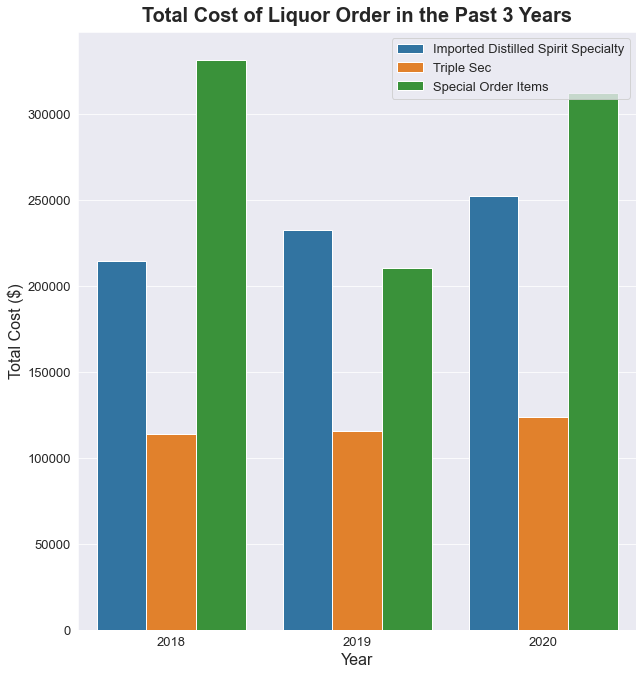

In [91]:
plt.figure(figsize=(10,11)) 
sns.barplot(x='year', y='sale_dollars', data=top_3, 
            estimator=sum, hue='category_name')
plt.title('Total Cost of Liquor Order in the Past 3 Years',loc='center',weight = 'bold',pad =10,fontsize=20)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('Year',fontsize=16)
plt.ylabel('Total Cost ($)',fontsize=16)
plt.legend(loc='upper right',fontsize=13)
sns.set_style('darkgrid')
plt.savefig('total_cost_liquor.png');

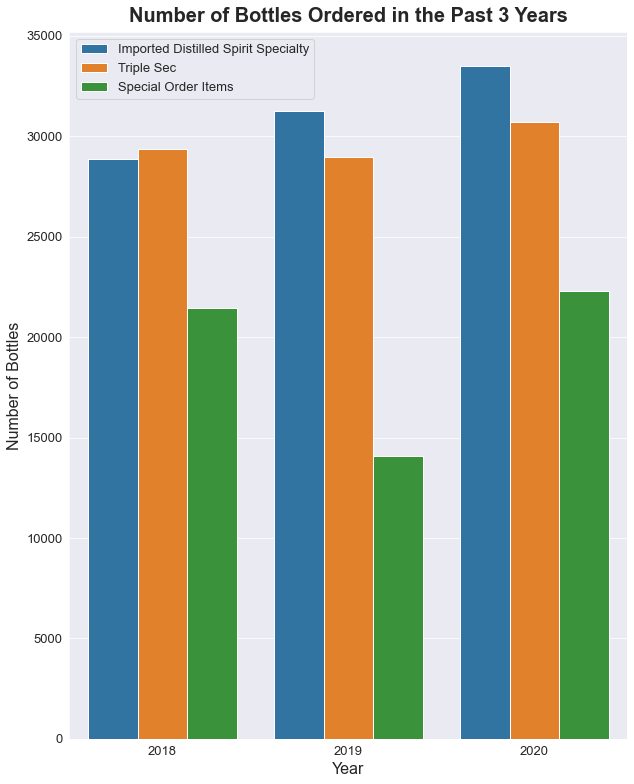

In [92]:
plt.figure(figsize=(10,13)) 
sns.barplot(x='year', y='bottles_sold', data=top_3, 
            estimator=sum, hue='category_name')
plt.title('Number of Bottles Ordered in the Past 3 Years',loc='center',weight = 'bold',pad =10,fontsize=20)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('Year',fontsize=16)
plt.ylabel('Number of Bottles',fontsize=16)
plt.legend(loc='upper left',fontsize=13)
sns.set_style('darkgrid')
plt.savefig('bottles_liquor.png');

#### Based on these two plots, it can be concluded that in the last 3 years (2018, 2019, 2020) the top three categories of liquor ordered by stores in Iowa came from the Imported Distilled Spirit Specialty, Triple Sec and Special Order Item categories. The number of bottles ordered by stores in the Imported Distilled Spirit Specialty category has increased every year to 33507 bottles in the last year, while the Triple Sec category tends to be consistent in the number of orders. In the Special Order Item category, although the number of orders is not as much as the other two categories, this liquor category has a larger total ordering cost because this liquor category is not sold commercially so it requires a special order to buy it which makes the order price high. 

#### This could be an insight for the Special Order Item liquor category producer to reduce the cost order so the number of bottles order increases considering that this category of liquor has the 3rd largest total orders in Iowa. 